# Lab 01 - Ejercicio 5: Datos Sintéticos (Moons y Círculos Concéntricos)

## Objetivos
1. Generar datasets sintéticos (moons y círculos)
2. Entender por qué K-Means falla con formas no convexas
3. Comparar K-Means vs Clustering Jerárquico

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons, make_circles
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, silhouette_score
import sys
sys.path.append('../src')
from kmeans import KMeans

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

## 1. Generar Datos Sintéticos

In [2]:
# Generar datasets
n_samples = 200
random_state = 42

# Dataset 1: Moons (lunas)
X_moons, y_moons = make_moons(n_samples=n_samples, noise=0.05, random_state=random_state)

# Dataset 2: Círculos concéntricos
X_circles, y_circles = make_circles(n_samples=n_samples, noise=0.05, 
                                    factor=0.5, random_state=random_state)

print(f"Moons shape: {X_moons.shape}")
print(f"Circles shape: {X_circles.shape}")

Moons shape: (200, 2)
Circles shape: (200, 2)


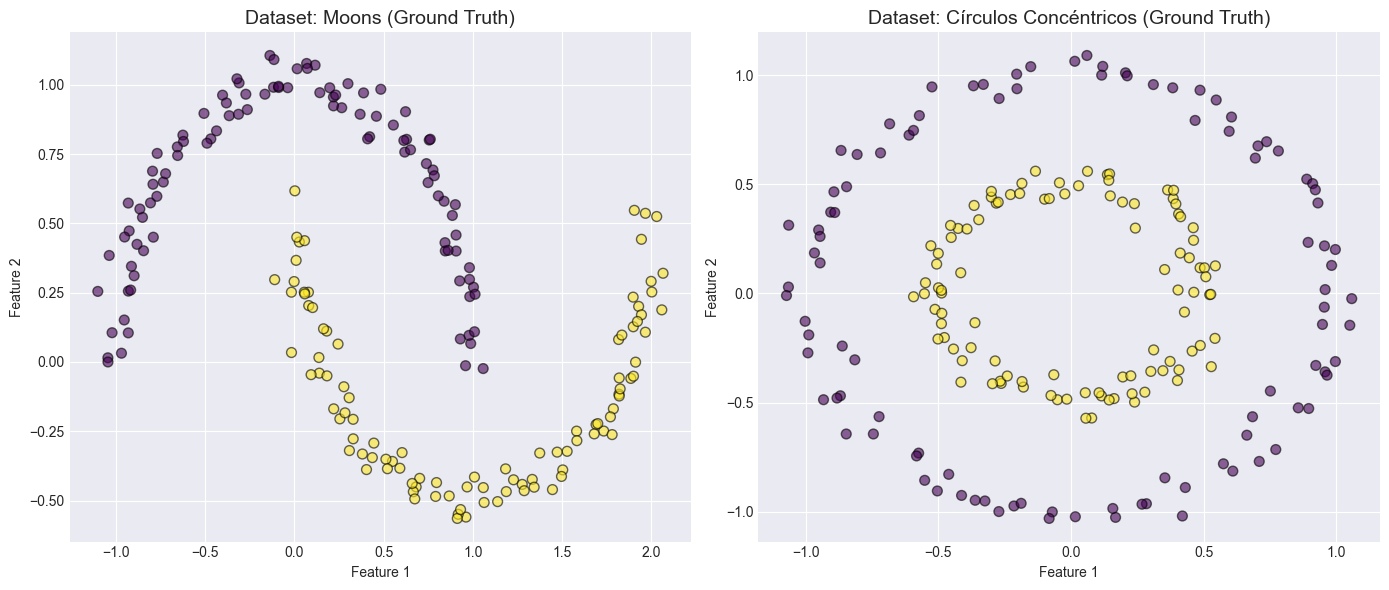

In [4]:
# Visualizar datos originales
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Moons
axes[0].scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, 
                cmap='viridis', s=50, alpha=0.6, edgecolors='black')
axes[0].set_title('Dataset: Moons (Ground Truth)', fontsize=14)
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

# Circles
axes[1].scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, 
                cmap='viridis', s=50, alpha=0.6, edgecolors='black')
axes[1].set_title('Dataset: Círculos Concéntricos (Ground Truth)', fontsize=14)
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

## 2. K-Means en Datos Sintéticos

In [5]:
# Aplicar K-Means (2 clusters)
kmeans_moons = KMeans(n_clusters=2, random_state=random_state)
labels_kmeans_moons = kmeans_moons.fit_predict(X_moons)

kmeans_circles = KMeans(n_clusters=2, random_state=random_state)
labels_kmeans_circles = kmeans_circles.fit_predict(X_circles)

# Métricas
ari_moons_km = adjusted_rand_score(y_moons, labels_kmeans_moons)
ari_circles_km = adjusted_rand_score(y_circles, labels_kmeans_circles)

silhouette_moons_km = silhouette_score(X_moons, labels_kmeans_moons)
silhouette_circles_km = silhouette_score(X_circles, labels_kmeans_circles)

print("K-Means Performance:")
print(f"\nMoons:")
print(f"  ARI: {ari_moons_km:.4f}")
print(f"  Silhouette: {silhouette_moons_km:.4f}")
print(f"\nCircles:")
print(f"  ARI: {ari_circles_km:.4f}")
print(f"  Silhouette: {silhouette_circles_km:.4f}")

Convergió en la iteración 11
Convergió en la iteración 3
K-Means Performance:

Moons:
  ARI: 0.2170
  Silhouette: 0.4832

Circles:
  ARI: -0.0041
  Silhouette: 0.3463


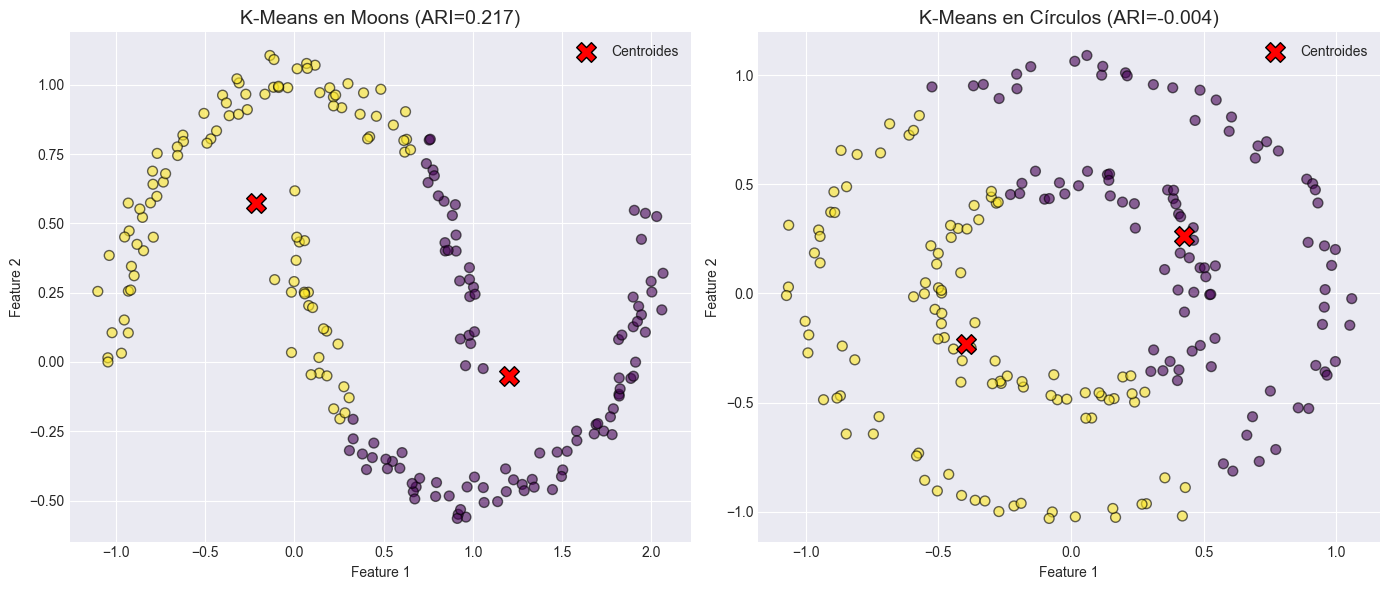

In [7]:
# Visualizar resultados K-Means
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Moons
axes[0].scatter(X_moons[:, 0], X_moons[:, 1], c=labels_kmeans_moons, 
                cmap='viridis', s=50, alpha=0.6, edgecolors='black')
axes[0].scatter(kmeans_moons.centroids[:, 0], kmeans_moons.centroids[:, 1],
                c='red', marker='X', s=200, edgecolors='black', label='Centroides')
axes[0].set_title(f'K-Means en Moons (ARI={ari_moons_km:.3f})', fontsize=14)
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].legend()

# Circles
axes[1].scatter(X_circles[:, 0], X_circles[:, 1], c=labels_kmeans_circles, 
                cmap='viridis', s=50, alpha=0.6, edgecolors='black')
axes[1].scatter(kmeans_circles.centroids[:, 0], kmeans_circles.centroids[:, 1],
                c='red', marker='X', s=200, edgecolors='black', label='Centroides')
axes[1].set_title(f'K-Means en Círculos (ARI={ari_circles_km:.3f})', fontsize=14)
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].legend()

plt.tight_layout()
plt.show()

## 3. Clustering Jerárquico en Datos Sintéticos

In [8]:
# Probar diferentes métodos de linkage
linkage_methods = ['single', 'complete', 'average', 'ward']

results_moons = {}
results_circles = {}

print("Clustering Jerárquico - Moons:")
print("=" * 50)
for method in linkage_methods:
    hierarchical = AgglomerativeClustering(n_clusters=2, linkage=method)
    labels = hierarchical.fit_predict(X_moons)
    ari = adjusted_rand_score(y_moons, labels)
    silhouette = silhouette_score(X_moons, labels)
    results_moons[method] = {'labels': labels, 'ari': ari, 'silhouette': silhouette}
    print(f"{method:10s} - ARI: {ari:.4f}, Silhouette: {silhouette:.4f}")

print("\nClustering Jerárquico - Circles:")
print("=" * 50)
for method in linkage_methods:
    hierarchical = AgglomerativeClustering(n_clusters=2, linkage=method)
    labels = hierarchical.fit_predict(X_circles)
    ari = adjusted_rand_score(y_circles, labels)
    silhouette = silhouette_score(X_circles, labels)
    results_circles[method] = {'labels': labels, 'ari': ari, 'silhouette': silhouette}
    print(f"{method:10s} - ARI: {ari:.4f}, Silhouette: {silhouette:.4f}")

Clustering Jerárquico - Moons:
single     - ARI: 1.0000, Silhouette: 0.3224
complete   - ARI: 0.4461, Silhouette: 0.4691
average    - ARI: 0.4464, Silhouette: 0.4415
ward       - ARI: 0.4464, Silhouette: 0.4415

Clustering Jerárquico - Circles:
single     - ARI: 1.0000, Silhouette: 0.1069
complete   - ARI: -0.0024, Silhouette: 0.3378
average    - ARI: -0.0014, Silhouette: 0.3438
ward       - ARI: -0.0045, Silhouette: 0.3386


In [10]:
# Encontrar mejor método
best_method_moons = max(results_moons, key=lambda x: results_moons[x]['ari'])
best_method_circles = max(results_circles, key=lambda x: results_circles[x]['ari'])

print(f"\n Mejor método para Moons: {best_method_moons.upper()}")
print(f"   ARI: {results_moons[best_method_moons]['ari']:.4f}")
print(f"   Silhouette: {results_moons[best_method_moons]['silhouette']:.4f}")

print(f"\n Mejor método para Circles: {best_method_circles.upper()}")
print(f"   ARI: {results_circles[best_method_circles]['ari']:.4f}")
print(f"   Silhouette: {results_circles[best_method_circles]['silhouette']:.4f}")


 Mejor método para Moons: SINGLE
   ARI: 1.0000
   Silhouette: 0.3224

 Mejor método para Circles: SINGLE
   ARI: 1.0000
   Silhouette: 0.1069


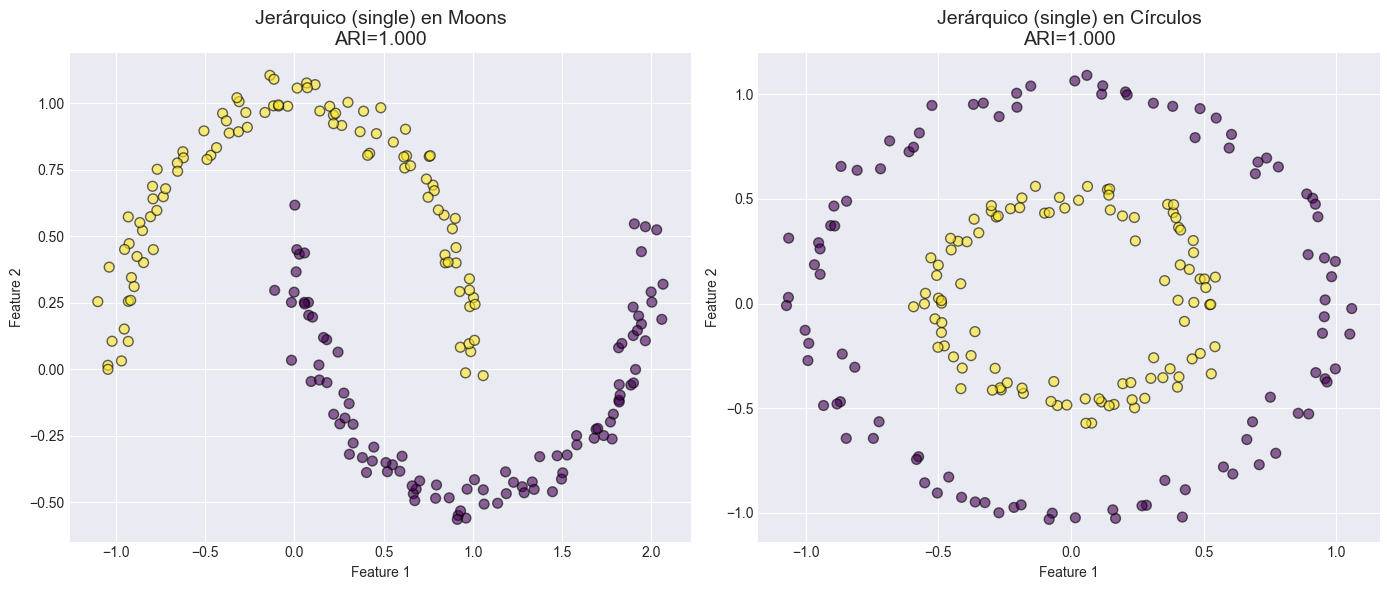

In [12]:
# Visualizar mejores resultados jerárquicos
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Moons
axes[0].scatter(X_moons[:, 0], X_moons[:, 1], 
                c=results_moons[best_method_moons]['labels'], 
                cmap='viridis', s=50, alpha=0.6, edgecolors='black')
axes[0].set_title(f'Jerárquico ({best_method_moons}) en Moons\nARI={results_moons[best_method_moons]["ari"]:.3f}', 
                 fontsize=14)
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

# Circles
axes[1].scatter(X_circles[:, 0], X_circles[:, 1], 
                c=results_circles[best_method_circles]['labels'], 
                cmap='viridis', s=50, alpha=0.6, edgecolors='black')
axes[1].set_title(f'Jerárquico ({best_method_circles}) en Círculos\nARI={results_circles[best_method_circles]["ari"]:.3f}', 
                 fontsize=14)
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

## 4. Comparación Completa: Todos los Métodos

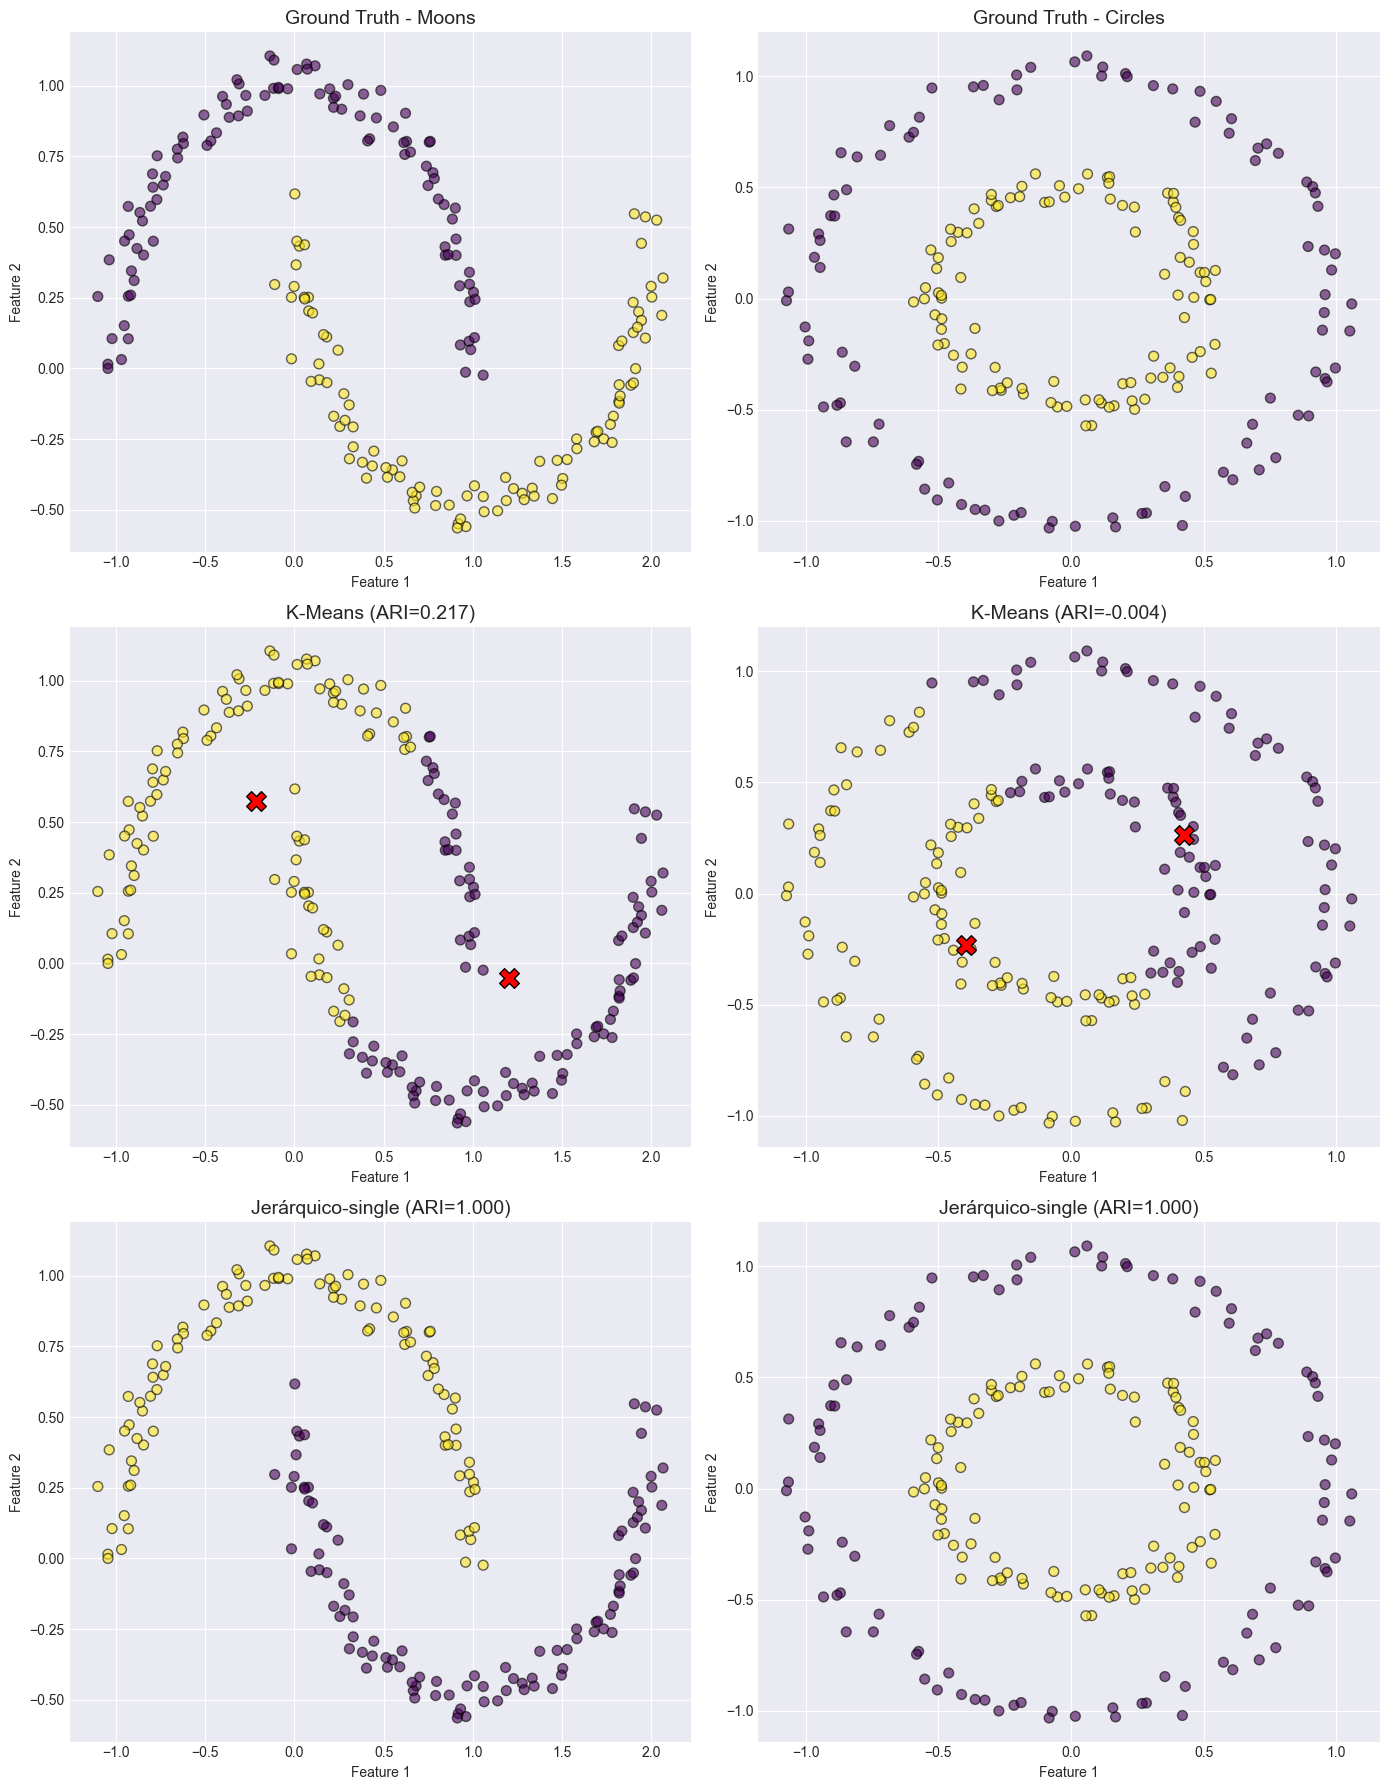

In [14]:
# Visualización comparativa completa
fig, axes = plt.subplots(3, 2, figsize=(14, 18))

# Ground truth
axes[0, 0].scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, 
                   cmap='viridis', s=50, alpha=0.6, edgecolors='black')
axes[0, 0].set_title('Ground Truth - Moons', fontsize=14)

axes[0, 1].scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, 
                   cmap='viridis', s=50, alpha=0.6, edgecolors='black')
axes[0, 1].set_title('Ground Truth - Circles', fontsize=14)

# K-Means
axes[1, 0].scatter(X_moons[:, 0], X_moons[:, 1], c=labels_kmeans_moons, 
                   cmap='viridis', s=50, alpha=0.6, edgecolors='black')
axes[1, 0].scatter(kmeans_moons.centroids[:, 0], kmeans_moons.centroids[:, 1],
                   c='red', marker='X', s=200, edgecolors='black')
axes[1, 0].set_title(f'K-Means (ARI={ari_moons_km:.3f})', fontsize=14)

axes[1, 1].scatter(X_circles[:, 0], X_circles[:, 1], c=labels_kmeans_circles, 
                   cmap='viridis', s=50, alpha=0.6, edgecolors='black')
axes[1, 1].scatter(kmeans_circles.centroids[:, 0], kmeans_circles.centroids[:, 1],
                   c='red', marker='X', s=200, edgecolors='black')
axes[1, 1].set_title(f'K-Means (ARI={ari_circles_km:.3f})', fontsize=14)

# Best Hierarchical
axes[2, 0].scatter(X_moons[:, 0], X_moons[:, 1], 
                   c=results_moons[best_method_moons]['labels'], 
                   cmap='viridis', s=50, alpha=0.6, edgecolors='black')
axes[2, 0].set_title(f'Jerárquico-{best_method_moons} (ARI={results_moons[best_method_moons]["ari"]:.3f})', 
                    fontsize=14)

axes[2, 1].scatter(X_circles[:, 0], X_circles[:, 1], 
                   c=results_circles[best_method_circles]['labels'], 
                   cmap='viridis', s=50, alpha=0.6, edgecolors='black')
axes[2, 1].set_title(f'Jerárquico-{best_method_circles} (ARI={results_circles[best_method_circles]["ari"]:.3f})', 
                    fontsize=14)

for ax in axes.flat:
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

## 5. Tabla Comparativa de Resultados

In [16]:
# Crear tabla comparativa
comparison_data = []

# K-Means
comparison_data.append({
    'Método': 'K-Means',
    'Dataset': 'Moons',
    'ARI': ari_moons_km,
    'Silhouette': silhouette_moons_km
})
comparison_data.append({
    'Método': 'K-Means',
    'Dataset': 'Circles',
    'ARI': ari_circles_km,
    'Silhouette': silhouette_circles_km
})

# Hierarchical - todos los métodos
for method in linkage_methods:
    comparison_data.append({
        'Método': f'Jerárquico-{method}',
        'Dataset': 'Moons',
        'ARI': results_moons[method]['ari'],
        'Silhouette': results_moons[method]['silhouette']
    })
    comparison_data.append({
        'Método': f'Jerárquico-{method}',
        'Dataset': 'Circles',
        'ARI': results_circles[method]['ari'],
        'Silhouette': results_circles[method]['silhouette']
    })

df_comparison = pd.DataFrame(comparison_data)
df_comparison = df_comparison.round(4)

print("\n" + "=" * 70)
print("TABLA COMPARATIVA DE TODOS LOS MÉTODOS")
print("=" * 70)
print(df_comparison.to_string(index=False))




TABLA COMPARATIVA DE TODOS LOS MÉTODOS
             Método Dataset     ARI  Silhouette
            K-Means   Moons  0.2170      0.4832
            K-Means Circles -0.0041      0.3463
  Jerárquico-single   Moons  1.0000      0.3224
  Jerárquico-single Circles  1.0000      0.1069
Jerárquico-complete   Moons  0.4461      0.4691
Jerárquico-complete Circles -0.0024      0.3378
 Jerárquico-average   Moons  0.4464      0.4415
 Jerárquico-average Circles -0.0014      0.3438
    Jerárquico-ward   Moons  0.4464      0.4415
    Jerárquico-ward Circles -0.0045      0.3386


## Análisis y Conclusiones

### a) ¿Por qué K-Means falla con formas de "luna" o anillos concéntricos?

K-Means asume que:
1. Los clusters son **esféricos** (
2. Los clusters tienen **tamaños similares**
3. La distancia **euclidiana** es apropiada

En datasets como moons y círculos:
- Las formas son **no convexas** (curvas, anillos)
- Los centroides caen en el "medio" entre las formas
- La división por distancia euclidiana corta las formas naturales



### b) Comparar K-Means vs. Clustering Jerárquico

**¿Cuál produce mejores resultados?**
El Clustering Jerárquico con single linkage produce mejores resultados, logrando un ARI de 1.0 en ambos datasets, mientras que K-Means obtiene ARI de 0.217 en Moons y -0.004 en Circles.

**¿Por qué?**
Single linkage encadena puntos cercanos permitiendo formar clusters de formas arbitrarias (curvas, anillos), mientras que K-Means solo puede crear particiones lineales basadas en centroides, inadecuado para geometrías no convexas.

**¿Cuál es el método y la métrica que funcionan mejor en el clustering jerárquico?**
El método **single linkage** con la métrica **ARI** funcionan mejor, ya que el ARI compara directamente con el ground truth y logra una clasificación perfecta (1.0), a diferencia del Silhouette que mide separación euclidiana y no captura bien formas no convexas. 